## Citrone performance Project

### Introduction
This project trains a machine learning model that will predict if a student will graduate / move from the beginner class to the intermediate class or not from the Stutern learning management platform (Citrone)

The columns in the dataset include:

 - S/N : Serial Number
 - Name : Names of Student
 - Email: Student's email address
 - Address: Student's Address during Application
 - Lesson Summary: Date column	
 - Quiz Summary
 - Assignment Summary	Grade Point Average	Intermediate class Eligibility

Due to the limited data point available for the initial training of the model, more data were generated random online from this website, the data were generated to reflect real world stutern student's data.
Downloaded dummy data from [https://www.mockaroo.com/] to add to the existing data, so as to make the machine learning model perform very well

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(style="ggplot")

In [66]:
df = pd.read_excel(r"C:\Users\TEMITOPE\Desktop\Stutern\SGA_1.3\Intermediate_class\Intertrack\Copy of Citrone Performance overview_id.xlsx")
df.head()

,S/N,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Intermediate class Eligibility
0,1,id_1,NaN,0/5,NaN,0,0.0,No
1,2,id_2,NaN,2023-05-05 00:00:00,NaN,70,56.0,Yes
2,3,id_3,NaN,2023-02-05 00:00:00,NaN,80,64.0,Yes
3,4,id_4,NaN,2023-05-05 00:00:00,NaN,100,80.0,Yes
4,5,id_5,NaN,2023-06-05 00:00:00,NaN,80,64.0,Yes


In [67]:
df_1 = pd.read_csv(r"C:\Users\TEMITOPE\Desktop\Stutern\SGA_1.3\Intermediate_class\Intertrack\MOCK_DATA_1.csv")
df_1

,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Gender,Age,Children,Completed_Nysc,Intermediate class Eligibility
0,1,NaN,2023-01-24,77,61,17,Female,25,True,False,True
1,2,NaN,2023-04-08,89,2,77,Male,31,False,False,False
2,3,NaN,2023-01-12,80,61,59,Male,30,True,True,True
3,4,NaN,2023-02-24,73,71,57,Male,24,True,True,True
4,5,NaN,2023-03-08,92,82,13,Male,39,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,996,NaN,2023-02-20,76,1,6,Male,23,False,True,False
996,997,NaN,2023-02-04,60,99,54,Male,24,True,True,False
997,998,NaN,2023-04-10,93,37,17,Female,18,True,False,True
998,999,NaN,2023-01-19,64,19,16,Male,20,True,False,False


In [12]:
#df_1 = df_1.drop(columns=["Intermediate class Eligibility"], axis=1)
df_1.head()

,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Gender,Age,Children,Completed_Nysc
0,1,NaN,2023-01-24,77,61,17,Female,25,True,False
1,2,NaN,2023-04-08,89,2,77,Male,31,False,False
2,3,NaN,2023-01-12,80,61,59,Male,30,True,True
3,4,NaN,2023-02-24,73,71,57,Male,24,True,True
4,5,NaN,2023-03-08,92,82,13,Male,39,False,False


In [68]:
# Concatenating both dataframes
data = pd.concat([df, df_1], axis=False)
data.head()

,S/N,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Intermediate class Eligibility,Gender,Age,Children,Completed_Nysc
0,1.0,id_1,NaN,0/5,NaN,0,0.0,No,NaN,NaN,NaN,NaN
1,2.0,id_2,NaN,2023-05-05 00:00:00,NaN,70,56.0,Yes,NaN,NaN,NaN,NaN
2,3.0,id_3,NaN,2023-02-05 00:00:00,NaN,80,64.0,Yes,NaN,NaN,NaN,NaN
3,4.0,id_4,NaN,2023-05-05 00:00:00,NaN,100,80.0,Yes,NaN,NaN,NaN,NaN
4,5.0,id_5,NaN,2023-06-05 00:00:00,NaN,80,64.0,Yes,NaN,NaN,NaN,NaN


In [69]:
data = data.reset_index(drop=True)

In [70]:
# replace column spaces with underscore
new_columns = []
for col in data.columns:
    if " " in col:
        fill = col.replace(" ", "_")
        new_columns.append(fill)
    else:
        new_columns.append(col)        

In [34]:
new_columns

['S/N',
 'Name',
 'Email_Address',
 'Lesson_Summary',
 'Quiz_Summary',
 'Assignment_Summary',
 'Grade_Point_Average',
 'Intermediate_class_Eligibility',
 'Gender',
 'Age',
 'Children',
 'Completed_Nysc']

In [71]:
data.columns = new_columns

In [72]:
#converting the new column names to lowercase
data.columns = data.columns.str.lower()

In [73]:
data.head()

,s/n,name,email_address,lesson_summary,quiz_summary,assignment_summary,grade_point_average,intermediate_class_eligibility,gender,age,children,completed_nysc
0,1.0,id_1,NaN,0/5,NaN,0,0.0,No,NaN,NaN,NaN,NaN
1,2.0,id_2,NaN,2023-05-05 00:00:00,NaN,70,56.0,Yes,NaN,NaN,NaN,NaN
2,3.0,id_3,NaN,2023-02-05 00:00:00,NaN,80,64.0,Yes,NaN,NaN,NaN,NaN
3,4.0,id_4,NaN,2023-05-05 00:00:00,NaN,100,80.0,Yes,NaN,NaN,NaN,NaN
4,5.0,id_5,NaN,2023-06-05 00:00:00,NaN,80,64.0,Yes,NaN,NaN,NaN,NaN


In [74]:
# dropping the eligibility column altogether
data = data.drop(columns="intermediate_class_eligibility", axis=1)

In [75]:
data.head(1)

,s/n,name,email_address,lesson_summary,quiz_summary,assignment_summary,grade_point_average,gender,age,children,completed_nysc
0,1.0,id_1,NaN,0/5,NaN,0,0.0,NaN,NaN,NaN,NaN


In [76]:
data.isnull().sum()

s/n                    1000
name                      0
email_address          1060
lesson_summary            0
quiz_summary             60
assignment_summary        0
grade_point_average       0
gender                   60
age                      60
children                 60
completed_nysc           60
dtype: int64

In [77]:
# dealing with missing values
data.dtypes

s/n                    float64
name                    object
email_address          float64
lesson_summary          object
quiz_summary           float64
assignment_summary       int64
grade_point_average    float64
gender                  object
age                    float64
children                object
completed_nysc          object
dtype: object

In [78]:
for col in data.columns:
    if data[col].dtype == np.dtype("float64"):
        data[col] = data[col].fillna(data[col].mean()).round()
        
    elif data[col].dtype == np.dtype("int64"):
        data[col] = data[col].fillna(data[col].mean()).round()
    elif data[col].dtype == np.dtype("object"):
        data[col] = data[col].fillna(data[col].mode()[0])

C:\Users\TEMITOPE\anaconda3\lib\site-packages\pandas\core\algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")


In [79]:
data.head(2)

,s/n,name,email_address,lesson_summary,quiz_summary,assignment_summary,grade_point_average,gender,age,children,completed_nysc
0,1.0,id_1,NaN,0/5,73.0,0,0.0,Male,29.0,True,True
1,2.0,id_2,NaN,2023-05-05 00:00:00,73.0,70,56.0,Male,29.0,True,True


In [65]:
data.age.dtype

dtype('float64')

In [83]:
# dropping the irrelevant columns
cleaned_df = data.drop(columns=["s/n","name", "email_address", "lesson_summary"], axis=1)
cleaned_df.head(2)

,quiz_summary,assignment_summary,grade_point_average,gender,age,children,completed_nysc
0,73.0,0,0.0,Male,29.0,True,True
1,73.0,70,56.0,Male,29.0,True,True


In [85]:
# Calculating the correct values for Grade point Avg column
cleaned_df.grade_point_average = (cleaned_df.quiz_summary + cleaned_df.assignment_summary) / 2

In [87]:
cleaned_df.tail()

,quiz_summary,assignment_summary,grade_point_average,gender,age,children,completed_nysc
1055,76.0,1,38.5,Male,23.0,False,True
1056,60.0,99,79.5,Male,24.0,True,True
1057,93.0,37,65.0,Female,18.0,True,False
1058,64.0,19,41.5,Male,20.0,True,False
1059,86.0,84,85.0,Female,22.0,True,True


In [89]:
# calculating the correct values for eligibility column
def grade_point(row):
    if row >= 50:
        return "Yes"
    else:
        return "No"

In [91]:
cleaned_df["eligibility_status"] = cleaned_df.grade_point_average.apply(lambda x:grade_point(x) )

In [95]:
cleaned_df.tail(7)

,quiz_summary,assignment_summary,grade_point_average,gender,age,children,completed_nysc,eligibility_status
1053,49.0,86,67.5,Male,23.0,False,True,Yes
1054,82.0,90,86.0,Female,19.0,True,False,Yes
1055,76.0,1,38.5,Male,23.0,False,True,No
1056,60.0,99,79.5,Male,24.0,True,True,Yes
1057,93.0,37,65.0,Female,18.0,True,False,Yes
1058,64.0,19,41.5,Male,20.0,True,False,No
1059,86.0,84,85.0,Female,22.0,True,True,Yes


### Exploratory Data Analysis

In [96]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   quiz_summary         1060 non-null   float64
 1   assignment_summary   1060 non-null   int64  
 2   grade_point_average  1060 non-null   float64
 3   gender               1060 non-null   object 
 4   age                  1060 non-null   float64
 5   children             1060 non-null   bool   
 6   completed_nysc       1060 non-null   bool   
 7   eligibility_status   1060 non-null   object 
dtypes: bool(2), float64(3), int64(1), object(2)
memory usage: 51.9+ KB


In [97]:
cleaned_df.describe()

,quiz_summary,assignment_summary,grade_point_average,age
count,1060.000000,1060.000000,1060.000000,1060.000000
mean,73.340566,49.350000,61.345283,29.039623
std,15.663363,30.019873,17.223209,6.367435
min,45.000000,0.000000,23.500000,18.000000
25%,60.000000,22.000000,48.000000,24.000000
50%,73.000000,51.000000,61.750000,29.000000
75%,87.000000,75.000000,75.000000,34.000000
max,100.000000,100.000000,97.500000,40.000000


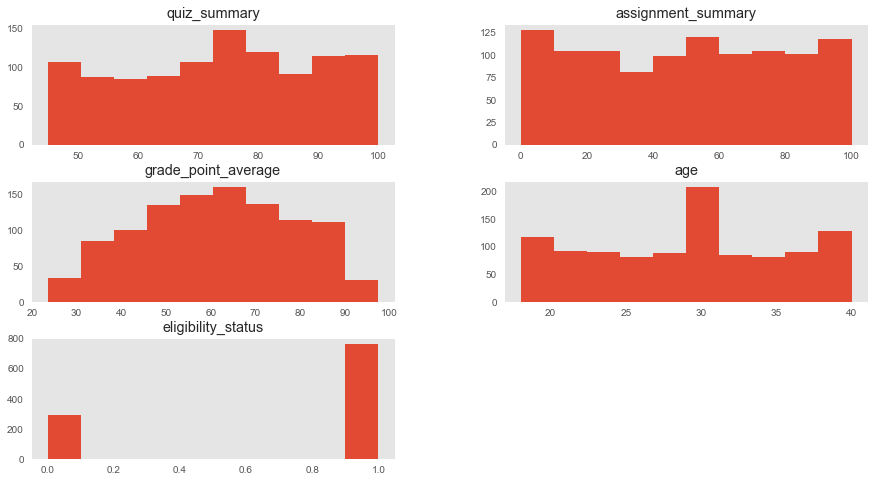

In [108]:
cleaned_df.hist(figsize=(15, 8), grid=False);

In [107]:
cleaned_df.eligibility_status = (cleaned_df.eligibility_status == "Yes").astype(int)

<AxesSubplot:xlabel='eligibility_status', ylabel='count'>

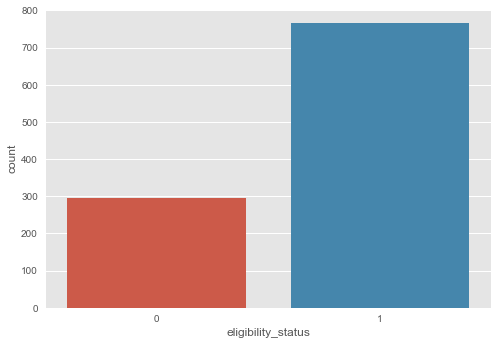

In [109]:
sns.countplot(data=cleaned_df, x= "eligibility_status")

In [115]:
cleaned_df.select_dtypes("number").corr()["eligibility_status"]

quiz_summary           0.379847
assignment_summary     0.690260
grade_point_average    0.774281
age                    0.021736
eligibility_status     1.000000
Name: eligibility_status, dtype: float64

In [111]:
# Checking the correlation of other variables with the target variable
cleaned_df.corr()["eligibility_status"]

quiz_summary           0.379847
assignment_summary     0.690260
grade_point_average    0.774281
age                    0.021736
children              -0.004748
completed_nysc        -0.008512
eligibility_status     1.000000
Name: eligibility_status, dtype: float64

In [118]:
# getting the dummies of the numeric fields
cleaned_df = pd.get_dummies(cleaned_df, drop_first=True)
cleaned_df.head(2)

,quiz_summary,assignment_summary,grade_point_average,age,children,completed_nysc,eligibility_status,gender_Male
0,73.0,0,36.5,29.0,True,True,0,1
1,73.0,70,71.5,29.0,True,True,1,1


In [120]:
X = cleaned_df.drop("eligibility_status", axis=1)
y = cleaned_df.eligibility_status

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [124]:
# splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
models = {
    "Logistic regression" : LogisticRegression(),
    "Decision tree": DecisionTreeClassifier(),
    "Randomforest" : RandomForestClassifier(),
    "Svm" : SVC()
}

for name, model in models.items():
    print(name, ":", np.mean(cross_val_score(model, x_test, y_test)))

Logistic regression : 0.9953488372093023
Decision tree : 0.9953488372093023
Randomforest : 0.9953488372093023
Svm : 0.9763012181616834


In [133]:
np.mean(cross_val_score(LogisticRegression(), x_test, y_test))

0.9953488372093023